One way to determine whether a random variable follows a normal distribution is by computing the mean and standard deviation from a sample and overlap the sample's histogram to a normal PDF curve computed from that mean and standard deviation. The closer the histogram and the curve are, the closer the distribution of the random variable is to a normal distribution.

Another method to test the normality of a random variable is by plotting a q-q plot (quantile-quantile plot). The q-q plot plots the quantile values of one distribution on the x axis against the quantile values of another distribution on the y axis. In our case, we would have to plot the quantiles of our random variable's distribution agains those of a theoretical normal distribution with the same mean and standard deviation. The closest the plot is to a straight line, the closer the distribution is to a theoretical normal distribution. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as st

### Increasingly larger samples

The following code shows the q-q plot for a sample taken from a normal random variable as we increase the size of the sample. The idea is to show how the plot gets more and more straight as the size of the sample increases.

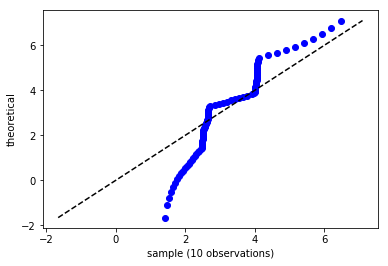

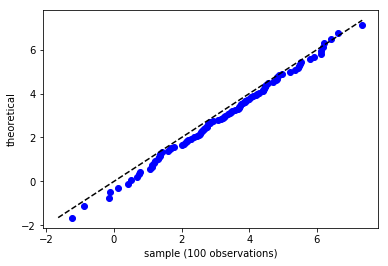

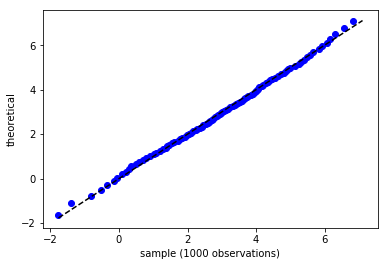

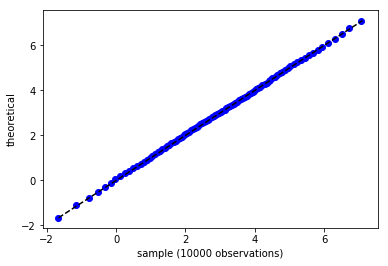

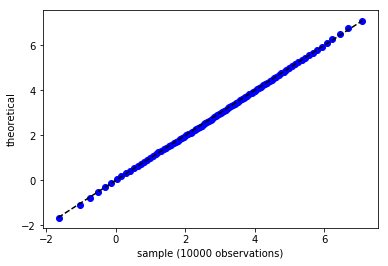

In [2]:
MEAN = 3
STD = 2

# Using scipy to calculate the percentiles of the normal distribution
quantiles = np.arange(0.01,0.99,0.01)
q_theoretical = [st.norm.ppf(i, loc=MEAN, scale=STD) for i in quantiles]

# Increasing size samples
SIZES = [10, 100, 1000, 10000, 10000]
for s in SIZES:
    sample = np.random.normal(MEAN, STD, s)
    q_sample = [np.percentile(sample, i*100) for i in quantiles]
    
    fig, ax = plt.subplots()
    ax.scatter(q_sample, q_theoretical, color='blue')
    
    min_value = min(np.min(q_theoretical), np.min(q_sample))
    max_value = max(np.max(q_theoretical), np.max(q_sample))
    ax.plot([min_value, max_value], [min_value, max_value], 'k--')
    
    ax.set_xlabel('sample (' + str(s) + ' observations)')
    ax.set_ylabel('theoretical')

### Skewed distributions

What's the shape of a q-q plot in the case of distributions which are skewed to the right or to the left?

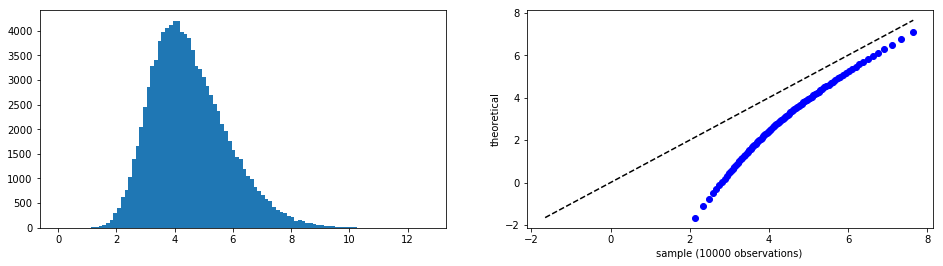

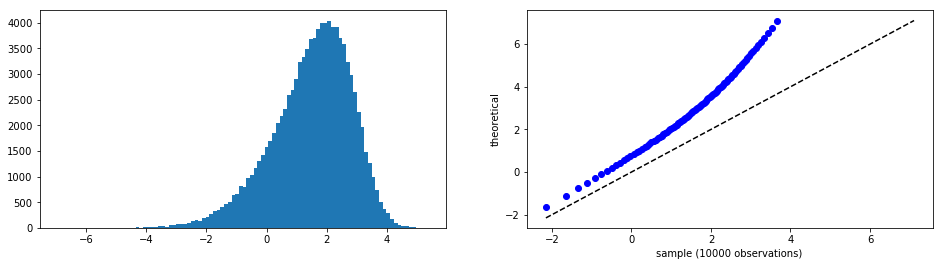

In [3]:
def plot_skew(a):
    sample = st.skewnorm(a=a, loc=MEAN, scale=STD).rvs(size=100000)
    q_sample = [np.percentile(sample, i*100) for i in quantiles]
    
    fig, ax = plt.subplots(1,2)
    
    ax[0].hist(sample,100)
    
    ax[1].scatter(q_sample, q_theoretical, color='blue')
    min_value = min(np.min(q_theoretical), np.min(q_sample))
    max_value = max(np.max(q_theoretical), np.max(q_sample))
    ax[1].plot([min_value, max_value], [min_value, max_value], 'k--')
    ax[1].set_xlabel('sample (' + str(s) + ' observations)')
    ax[1].set_ylabel('theoretical')
    
    fig.set_figwidth(16)
    
plot_skew(3)
plot_skew(-3)

### A bimodal distribution

In this case we show the q-q plot for a bimodal distribution. The bimodal distribution is formed by merging samples from two different normal distributions

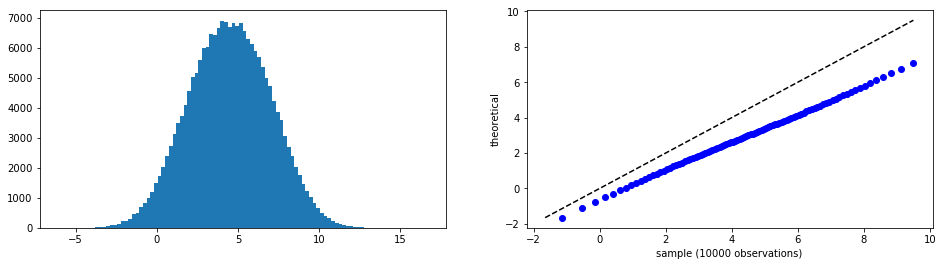

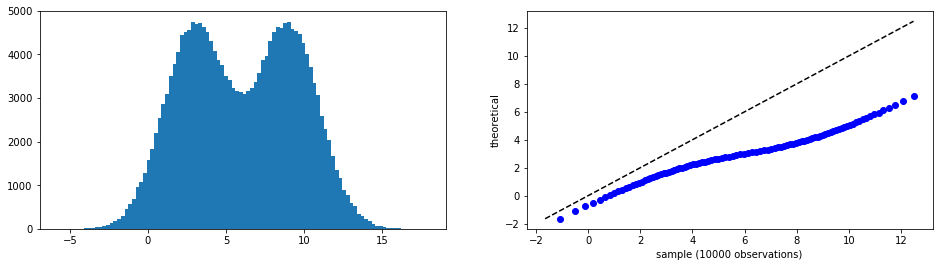

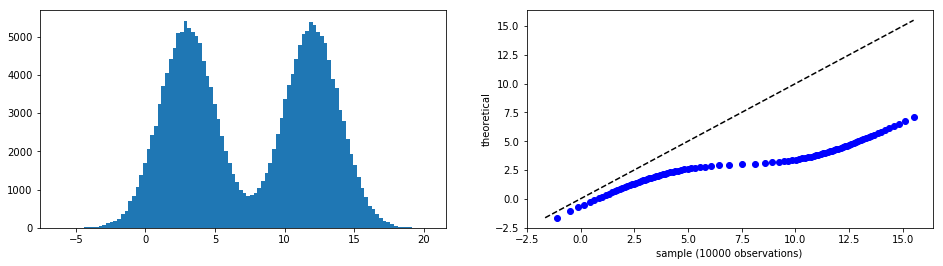

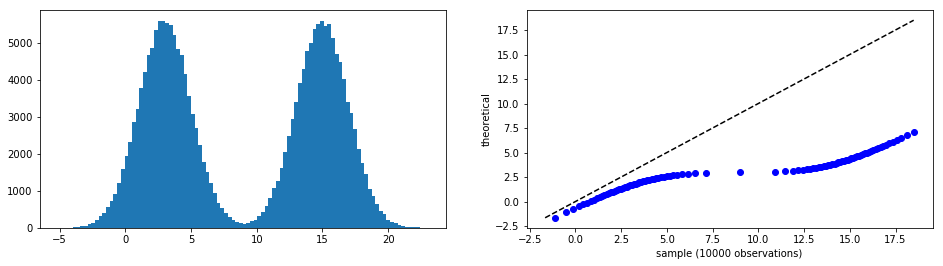

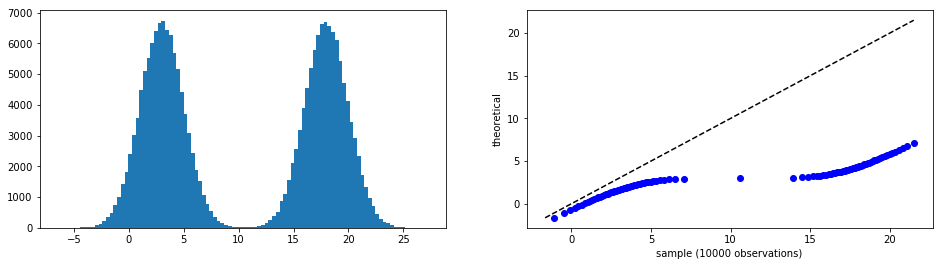

In [4]:
def plot_bimodal(a):    
    sample1 = np.random.normal(MEAN, STD, 100000) 
    sample2 = np.random.normal(a*MEAN, STD, 100000)
    sample = np.concatenate((sample1, sample2))
    q_sample = [np.percentile(sample, i*100) for i in quantiles]

    fig, ax = plt.subplots(1,2)

    ax[0].hist(sample,100)

    ax[1].scatter(q_sample, q_theoretical, color='blue')
    min_value = min(np.min(q_theoretical), np.min(q_sample))
    max_value = max(np.max(q_theoretical), np.max(q_sample))
    ax[1].plot([min_value, max_value], [min_value, max_value], 'k--')
    ax[1].set_xlabel('sample (' + str(s) + ' observations)')
    ax[1].set_ylabel('theoretical')

    fig.set_figwidth(16)
    
for i in range(2,7):
    plot_bimodal(i)

## A uniform distribution

Finally, we observe what's the shape of a q-q plot for a uniform distribution.

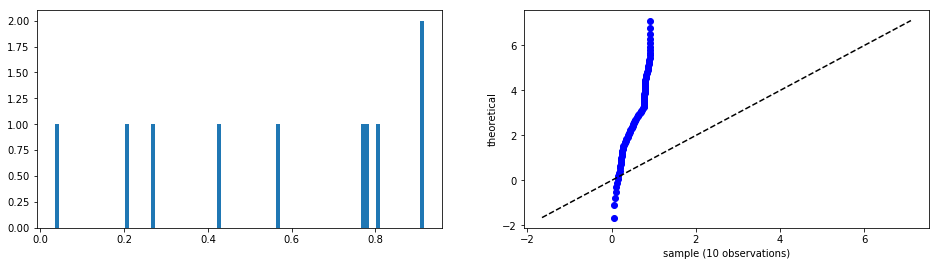

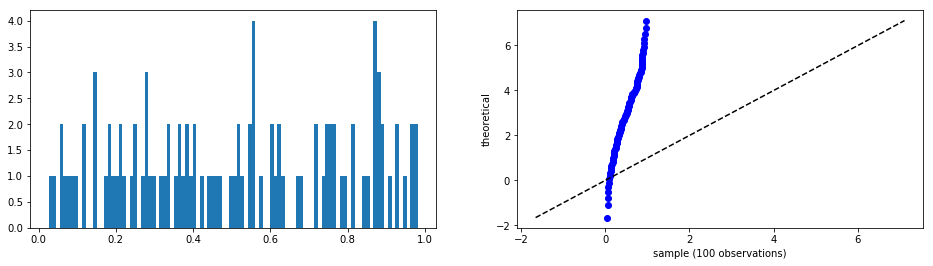

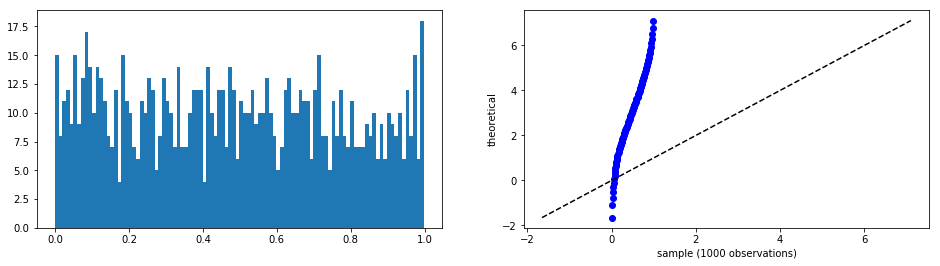

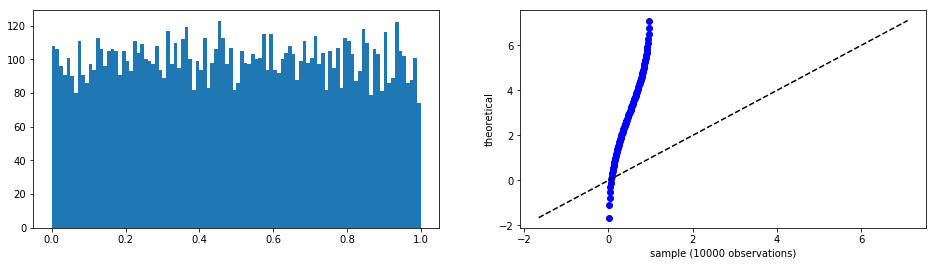

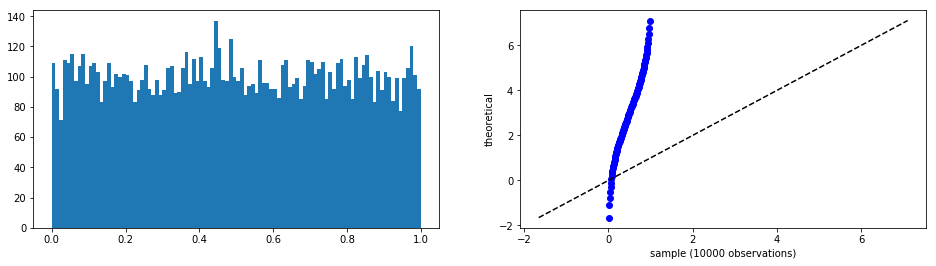

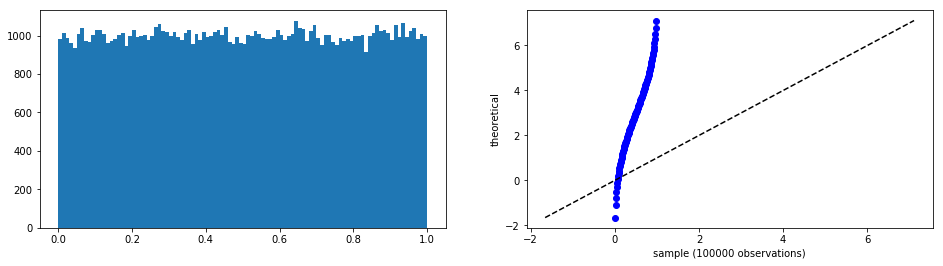

In [5]:
SIZES = [10, 100, 1000, 10000, 10000, 100000]
for s in SIZES:
    sample = np.random.uniform(size=s) 
    q_sample = [np.percentile(sample, i*100) for i in quantiles]

    fig, ax = plt.subplots(1,2)

    ax[0].hist(sample,100)

    ax[1].scatter(q_sample, q_theoretical, color='blue')
    min_value = min(np.min(q_theoretical), np.min(q_sample))
    max_value = max(np.max(q_theoretical), np.max(q_sample))
    ax[1].plot([min_value, max_value], [min_value, max_value], 'k--')
    ax[1].set_xlabel('sample (' + str(s) + ' observations)')
    ax[1].set_ylabel('theoretical')

    fig.set_figwidth(16)